In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries and Data Visualization & Preprocessing

In [29]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sn
from random import seed
from random import randrange
import joblib
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn import metrics
from scipy import interp

In [30]:
from drive.MyDrive.DL.Assignment_2 import dl_toolkit as mlp

In [ ]:
data = pd.read_pickle('/content/drive/MyDrive/DL/Assignment_2/train_set.pkl')

In [ ]:
data

,Image,Labels
0,<PIL.Image.Image image mode=L size=28x28 at 0x...,5
1,<PIL.Image.Image image mode=L size=28x28 at 0x...,0
2,<PIL.Image.Image image mode=L size=28x28 at 0x...,4
3,<PIL.Image.Image image mode=L size=28x28 at 0x...,1
4,<PIL.Image.Image image mode=L size=28x28 at 0x...,9
...,...,...
9995,<PIL.Image.Image image mode=L size=28x28 at 0x...,5
9996,<PIL.Image.Image image mode=L size=28x28 at 0x...,5
9997,<PIL.Image.Image image mode=L size=28x28 at 0x...,5
9998,<PIL.Image.Image image mode=L size=28x28 at 0x...,5


In [31]:
def makeData(data):
  X = np.array(data['Image'][0])
  X = X.reshape((1, X.shape[0] * X.shape[1]))
  y = np.full((data.shape[0],), -1)
  y[0] = data['Labels'][0]
  for i in range(1,data.shape[0]):
    x = np.array(data['Image'][i])
    x = x.reshape((1, x.shape[0] * x.shape[1]))
    X = np.concatenate((X, x))
    y[i] = data['Labels'][i]
  return X, y

In [32]:
X_train, y_train = makeData(data)

In [33]:
data1 = pd.read_pickle('/content/drive/MyDrive/DL/Assignment_2/val_set.pkl')
X_test, y_test = makeData(data1)

In [ ]:
X_train.shape, X_test.shape

((10000, 784), (2000, 784))

7


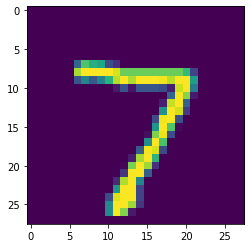

In [ ]:
plt.imshow(X_test[0].reshape(28, 28))
print(y_test[0])

# Neural Network

In [34]:
def plotting_epochs(training_, lossOrAccu):
  plt.figure(figsize=[6,4])
  plt.plot(training_, 'black', linewidth=2.0)
  plt.legend([lossOrAccu], fontsize=14)
  plt.xlabel('Epochs', fontsize=10)
  plt.ylabel(lossOrAccu, fontsize=10)
  plt.title(lossOrAccu+' Curves', fontsize=12)

def heatMap(y_test, y_pred, figsize):
  log_cm = metrics.confusion_matrix(np.array(y_test).astype('int'), y_pred.astype('int'))

  f, p = plt.subplots(figsize=figsize)
  sns.heatmap(log_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=p, cmap="YlGnBu")
  plt.title('Confusion Matrix', size=16)
  plt.xlabel('Predicted Labels', size=14)
  plt.ylabel('Original Labels', size=14)
  plt.show()

Optimizer : Gradient Full Batch

In [35]:
class GradientOptimizer:
   def __init__(self, params, learning_rate_init=0.001):
    self.params = [param for param in params]
    self.learning_rate_init = float(learning_rate_init)

   def update_param(self, gradients):
    for i in range(len(self.params)):
       self.params[i] -= (self.learning_rate_init * gradients[i]) 
    return self.params

## ReLU

In [ ]:
obj1 = mlp.MLPClassifier([784, 784, 392, 10], X_test, y_test, activation_function='relu', learning_rate=0.01)
obj1.fit(X_train, y_train)
print("Final Testing Accuracy: {0:.2f}%".format(obj1.score(X_test, y_test)*100))

Epoch:1/100 
	==============================> Training Accuracy: 0.259 - Training Loss: 25.597
Epoch:2/100 
	==============================> Training Accuracy: 0.266 - Training Loss: 25.351
Epoch:3/100 
	==============================> Training Accuracy: 0.359 - Training Loss: 22.132
Epoch:4/100 
	==============================> Training Accuracy: 0.423 - Training Loss: 19.929
Epoch:5/100 
	==============================> Training Accuracy: 0.472 - Training Loss: 18.230
Epoch:6/100 
	==============================> Training Accuracy: 0.569 - Training Loss: 14.883
Epoch:7/100 
	==============================> Training Accuracy: 0.622 - Training Loss: 13.049
Epoch:8/100 
	==============================> Training Accuracy: 0.640 - Training Loss: 12.420
Epoch:9/100 
	==============================> Training Accuracy: 0.683 - Training Loss: 10.945
Epoch:10/100 
	==============================> Training Accuracy: 0.706 - Training Loss: 10.151
Epoch:11/100 
	==============================> Tr

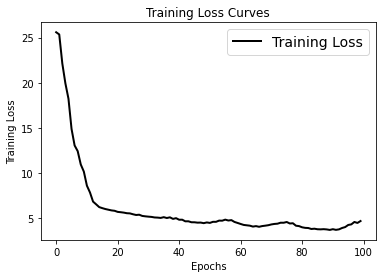

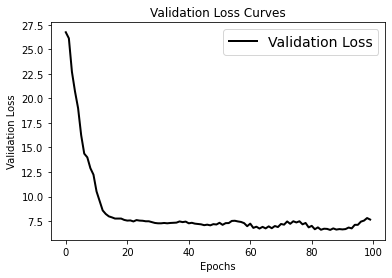

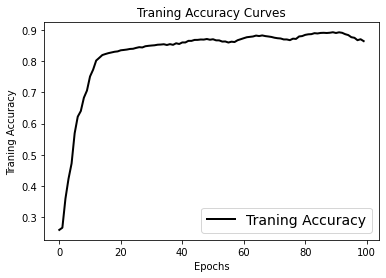

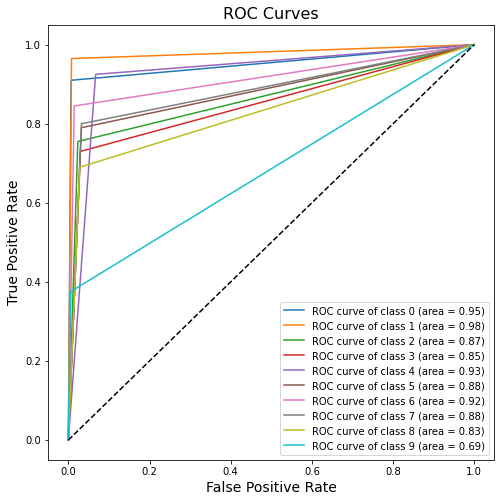

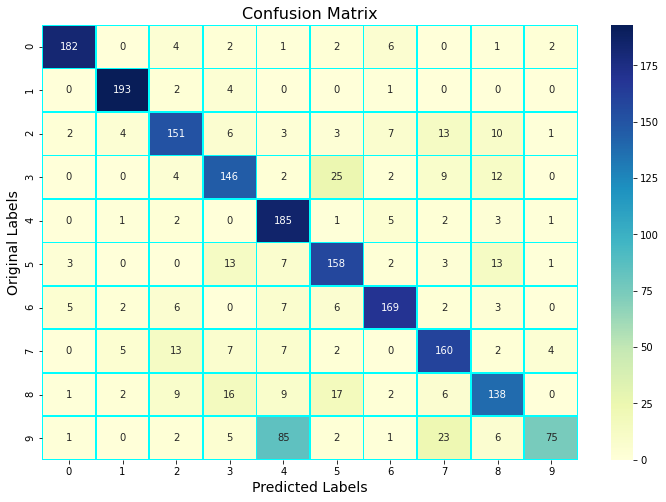

In [ ]:
# joblib.dump(obj1, '/content/drive/MyDrive/DL/Assignment_2/ReLU_Q1')
obj1 = joblib.load('/content/drive/MyDrive/DL/Assignment_2/ReLU_Q1')
l1,l2=obj1.get_loss()
plotting_epochs(l1, 'Training Loss')
plotting_epochs(l2,'Validation Loss')
plotting_epochs(obj1.get_accuracy(), 'Traning Accuracy')
obj1.roc_curve(X_test, y_test)
y_pred = obj1.predict(X_test)
heatMap(y_test, y_pred, (12,8))

In [ ]:
obj11 = mlp.MLPClassifier([784, 784, 392, 10], X_test, y_test, activation_function='relu', learning_rate=0.01, num_epochs=20)
obj11.fit(X_train, y_train)
print("Final Testing Accuracy: {0:.2f}%".format(obj11.score(X_test, y_test)*100))

Epoch:1/20 
	==============================> Training Accuracy: 0.141 - Training Loss: 29.686
Epoch:2/20 
	==============================> Training Accuracy: 0.259 - Training Loss: 25.597
Epoch:3/20 
	==============================> Training Accuracy: 0.266 - Training Loss: 25.351
Epoch:4/20 
	==============================> Training Accuracy: 0.359 - Training Loss: 22.132
Epoch:5/20 
	==============================> Training Accuracy: 0.423 - Training Loss: 19.929
Epoch:6/20 
	==============================> Training Accuracy: 0.472 - Training Loss: 18.230
Epoch:7/20 
	==============================> Training Accuracy: 0.569 - Training Loss: 14.883
Epoch:8/20 
	==============================> Training Accuracy: 0.622 - Training Loss: 13.049
Epoch:9/20 
	==============================> Training Accuracy: 0.640 - Training Loss: 12.420
Epoch:10/20 
	==============================> Training Accuracy: 0.683 - Training Loss: 10.945
Epoch:11/20 
	==============================> Training Accu

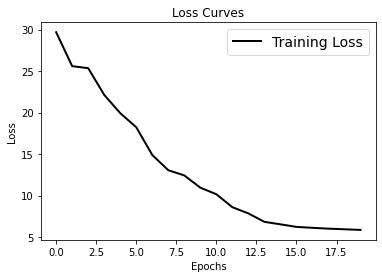

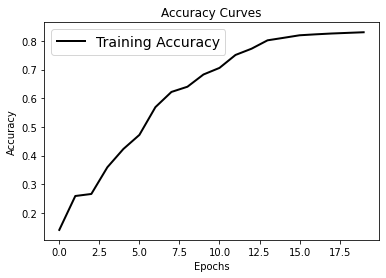

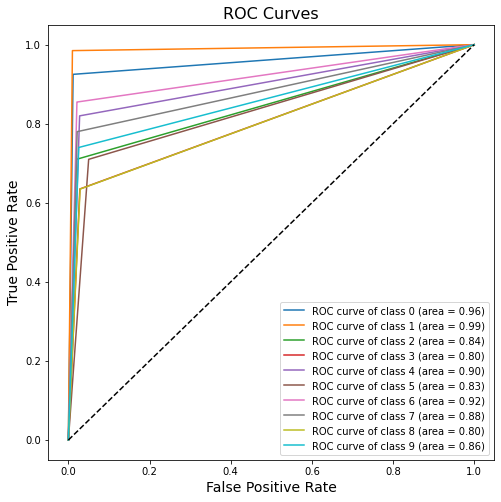

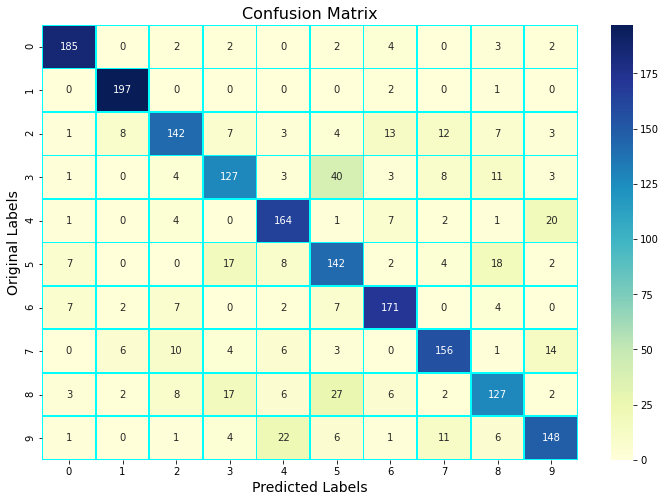

In [ ]:
# joblib.dump(obj11, '/content/drive/MyDrive/DL/Assignment_2/ReLU_Q1_LessEpoch_')
obj11_ = joblib.load('/content/drive/MyDrive/DL/Assignment_2/ReLU_Q1_LessEpoch_')
plotting_epochs(obj11_.get_loss(), 'Loss')
plotting_epochs(obj11_.get_accuracy(), 'Accuracy')
obj11_.roc_curve(X_test, y_test)
y_pred = obj11_.predict(X_test)
heatMap(y_test, y_pred, (12,8))

## Sigmoid

In [ ]:
obj22 = mlp.MLPClassifier([784, 784, 392, 10], activation_function='sigmoid', learning_rate=0.01)
obj22.fit(X_train, y_train)
print("Final Testing Accuracy: {0:.2f}%".format(obj22.score(X_test, y_test)*100))

Epoch:1/100 
	==============================> Training Accuracy: 0.138 - Training Loss: 10.315
Epoch:2/100 
	==============================> Training Accuracy: 0.139 - Training Loss: 9.914
Epoch:3/100 
	==============================> Training Accuracy: 0.139 - Training Loss: 9.562
Epoch:4/100 
	==============================> Training Accuracy: 0.140 - Training Loss: 9.250
Epoch:5/100 
	==============================> Training Accuracy: 0.141 - Training Loss: 8.970
Epoch:6/100 
	==============================> Training Accuracy: 0.140 - Training Loss: 8.719
Epoch:7/100 
	==============================> Training Accuracy: 0.141 - Training Loss: 8.491
Epoch:8/100 
	==============================> Training Accuracy: 0.140 - Training Loss: 8.285
Epoch:9/100 
	==============================> Training Accuracy: 0.141 - Training Loss: 8.098
Epoch:10/100 
	==============================> Training Accuracy: 0.140 - Training Loss: 7.927
Epoch:11/100 
	==============================> Training Ac

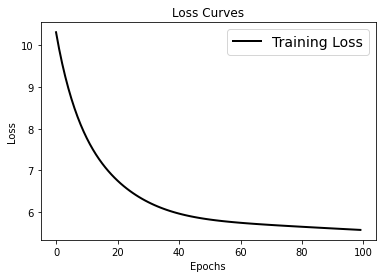

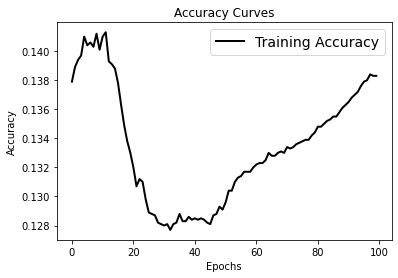

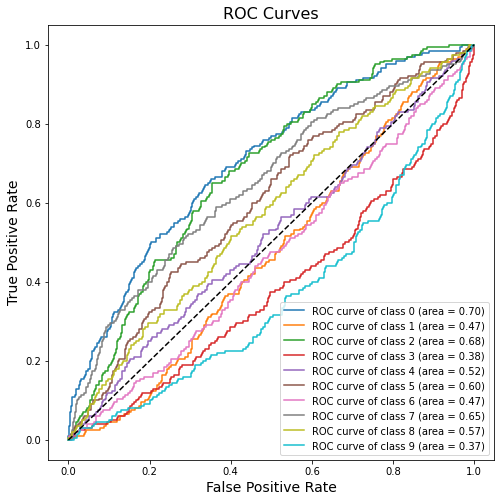

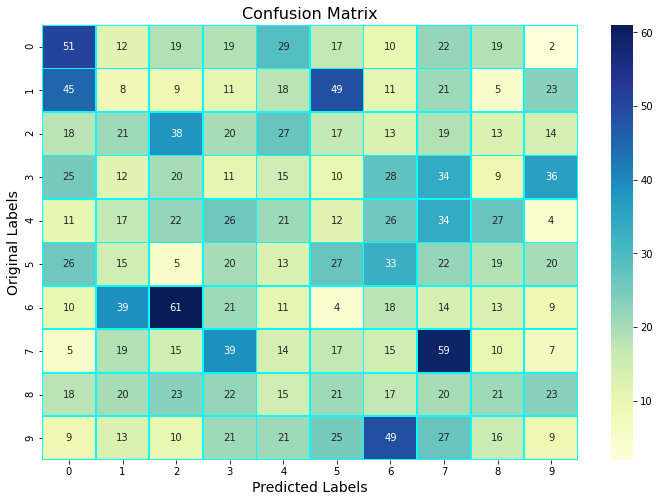

In [ ]:
plotting_epochs(obj22.get_loss(), 'Loss')
plotting_epochs(obj22.get_accuracy(), 'Accuracy')
obj22.roc_curve(X_test, y_test)
y_pred = obj22.predict(X_test)
heatMap(y_test, y_pred, (12,8))

In [ ]:
obj22 = mlp.MLPClassifier([784, 784, 392, 10], activation_function='sigmoid', learning_rate=1)
obj22.fit(X_train, y_train)
print("Final Testing Accuracy: {0:.2f}%".format(obj22.score(X_test, y_test)*100))

Epoch:1/100 
	==============================> Training Accuracy: 0.138 - Training Loss: 10.315
Epoch:2/100 
	==============================> Training Accuracy: 0.103 - Training Loss: 12.267
Epoch:3/100 
	==============================> Training Accuracy: 0.094 - Training Loss: 16.591
Epoch:4/100 
	==============================> Training Accuracy: 0.129 - Training Loss: 16.586
Epoch:5/100 
	==============================> Training Accuracy: 0.146 - Training Loss: 17.134
Epoch:6/100 
	==============================> Training Accuracy: 0.111 - Training Loss: 22.237
Epoch:7/100 
	==============================> Training Accuracy: 0.109 - Training Loss: 17.895
Epoch:8/100 
	==============================> Training Accuracy: 0.188 - Training Loss: 14.345
Epoch:9/100 
	==============================> Training Accuracy: 0.150 - Training Loss: 20.818
Epoch:10/100 
	==============================> Training Accuracy: 0.113 - Training Loss: 21.573
Epoch:11/100 
	==============================> Tr

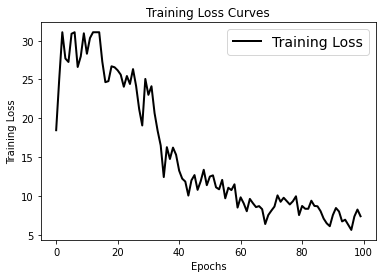

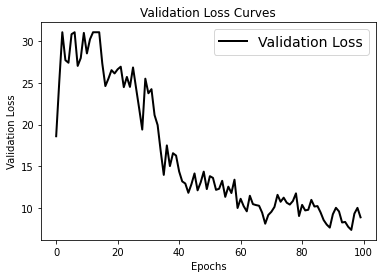

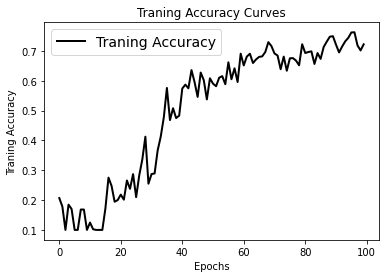

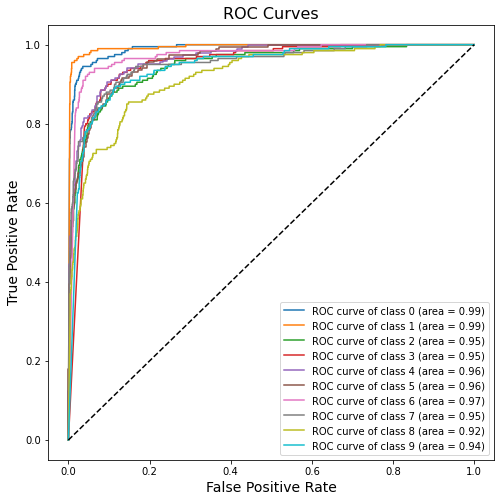

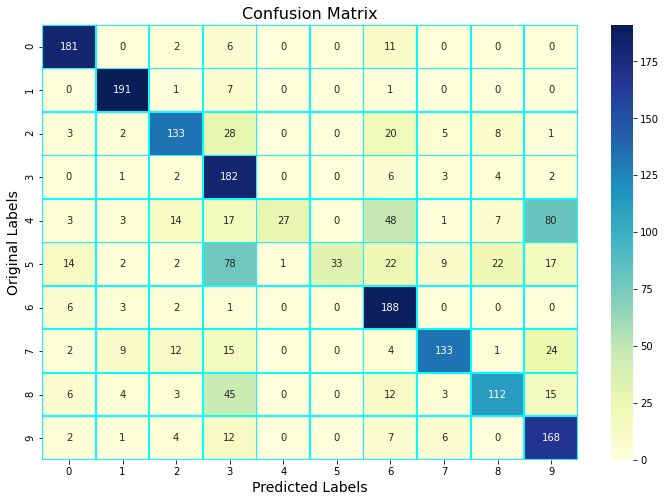

In [ ]:
joblib.dump(obj22, '/content/drive/MyDrive/DL/Assignment_2/Sigmoid_Q1')
obj2_ = joblib.load('/content/drive/MyDrive/DL/Assignment_2/Sigmoid_Q1')
l1,l2=obj2_.get_loss()
plotting_epochs(l1, 'Training Loss')
plotting_epochs(l2,'Validation Loss')
plotting_epochs(obj2_.get_accuracy(), 'Traning Accuracy')
obj2_.roc_curve(X_test, y_test)
y_pred = obj2_.predict(X_test)
heatMap(y_test, y_pred, (12,8))

In [ ]:
obj22 = mlp.MLPClassifier([784, 784, 392, 10], X_test, y_test, activation_function='sigmoid', learning_rate=10)
obj22.fit(X_train, y_train)
print("Final Testing Accuracy: {0:.2f}%".format(obj22.score(X_test, y_test)*100))

Epoch:1/100 
	==============================> Training Accuracy: 0.207 - Training Loss: 18.470
Epoch:2/100 
	==============================> Training Accuracy: 0.178 - Training Loss: 25.084
Epoch:3/100 
	==============================> Training Accuracy: 0.100 - Training Loss: 31.085
Epoch:4/100 
	==============================> Training Accuracy: 0.185 - Training Loss: 27.700
Epoch:5/100 
	==============================> Training Accuracy: 0.170 - Training Loss: 27.257
Epoch:6/100 
	==============================> Training Accuracy: 0.100 - Training Loss: 30.889
Epoch:7/100 
	==============================> Training Accuracy: 0.100 - Training Loss: 31.085
Epoch:8/100 
	==============================> Training Accuracy: 0.168 - Training Loss: 26.609
Epoch:9/100 
	==============================> Training Accuracy: 0.168 - Training Loss: 27.977
Epoch:10/100 
	==============================> Training Accuracy: 0.100 - Training Loss: 30.947
Epoch:11/100 
	==============================> Tr

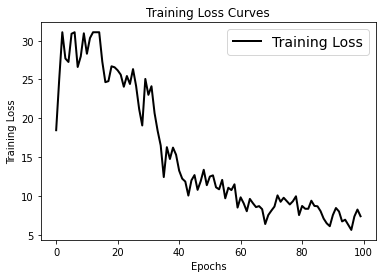

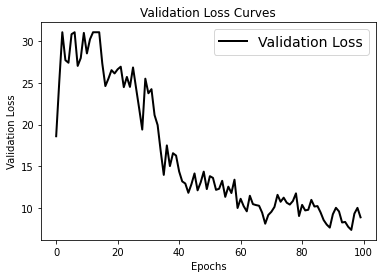

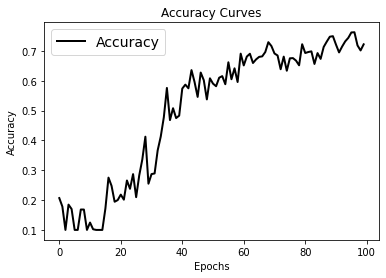

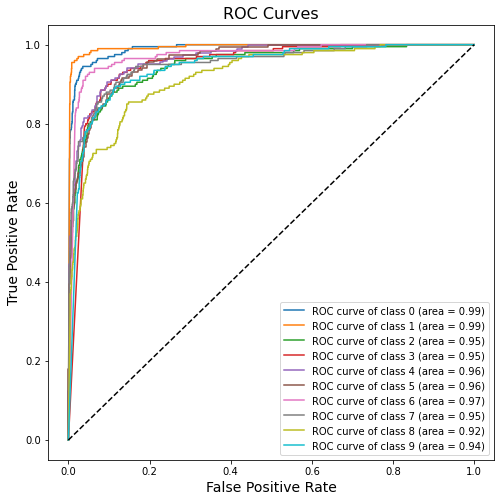

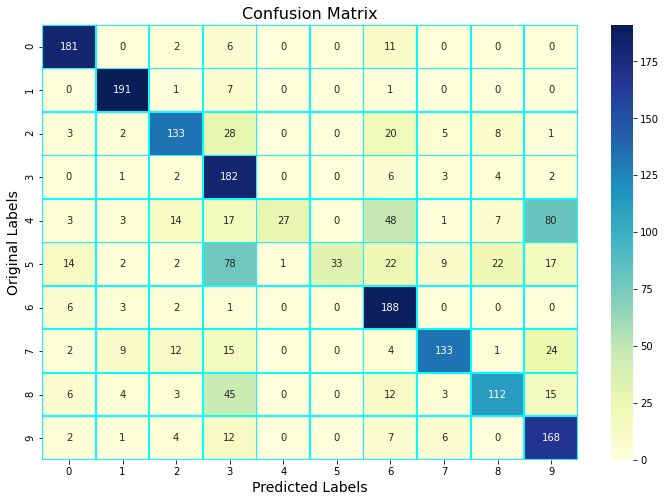

In [ ]:
# joblib.dump(obj22, '/content/drive/MyDrive/DL/Assignment_2/Sigmoid_Q1_GreaterLR')
obj2_ = joblib.load('/content/drive/MyDrive/DL/Assignment_2/Sigmoid_Q1_GreaterLR')
l1, l2 = obj2_.get_loss()
plotting_epochs(l1, 'Training Loss')
plotting_epochs(l2, 'Validation Loss')
plotting_epochs(obj2_.get_accuracy(), 'Accuracy')
obj2_.roc_curve(X_test, y_test)
y_pred = obj2_.predict(X_test)
heatMap(y_test, y_pred, (12,8))

## Tanh

In [ ]:
obj3 = MLPClassifier([784, 784, 392, 10], activation_function='tanh', learning_rate=0.01, num_epochs=20)
obj3.fit(X_train, y_train)
print("Final Testing Accuracy: {0:.2f}%".format(obj3.score(X_test, y_test)*100))

Epoch:1/20 
	==============================> Training Accuracy: 0.114 - Training Loss: 16.249
Epoch:2/20 
	==============================> Training Accuracy: 0.115 - Training Loss: 16.201
Epoch:3/20 
	==============================> Training Accuracy: 0.115 - Training Loss: 16.153
Epoch:4/20 
	==============================> Training Accuracy: 0.115 - Training Loss: 16.106
Epoch:5/20 
	==============================> Training Accuracy: 0.115 - Training Loss: 16.060
Epoch:6/20 
	==============================> Training Accuracy: 0.116 - Training Loss: 16.014
Epoch:7/20 
	==============================> Training Accuracy: 0.117 - Training Loss: 15.968
Epoch:8/20 
	==============================> Training Accuracy: 0.117 - Training Loss: 15.923
Epoch:9/20 
	==============================> Training Accuracy: 0.117 - Training Loss: 15.879
Epoch:10/20 
	==============================> Training Accuracy: 0.118 - Training Loss: 15.835
Epoch:11/20 
	==============================> Training Accu

In [ ]:
obj3 = mlp.MLPClassifier([784, 784, 392, 10], X_test, y_test, activation_function='tanh', learning_rate=1)
obj3.fit(X_train, y_train)
print("Final Testing Accuracy: {0:.2f}%".format(obj3.score(X_test, y_test)*100))

Epoch:1/100 
	==============================> Training Accuracy: 0.157 - Training Loss: 12.906
Epoch:2/100 
	==============================> Training Accuracy: 0.213 - Training Loss: 10.661
Epoch:3/100 
	==============================> Training Accuracy: 0.270 - Training Loss: 9.070
Epoch:4/100 
	==============================> Training Accuracy: 0.321 - Training Loss: 7.914
Epoch:5/100 
	==============================> Training Accuracy: 0.367 - Training Loss: 7.059
Epoch:6/100 
	==============================> Training Accuracy: 0.404 - Training Loss: 6.410
Epoch:7/100 
	==============================> Training Accuracy: 0.434 - Training Loss: 5.899
Epoch:8/100 
	==============================> Training Accuracy: 0.461 - Training Loss: 5.483
Epoch:9/100 
	==============================> Training Accuracy: 0.483 - Training Loss: 5.137
Epoch:10/100 
	==============================> Training Accuracy: 0.502 - Training Loss: 4.843
Epoch:11/100 
	==============================> Training A

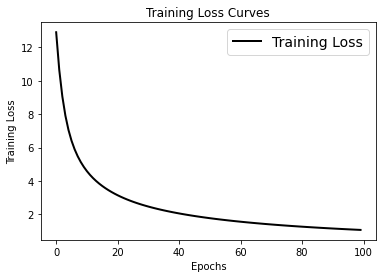

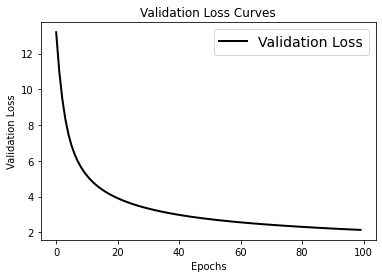

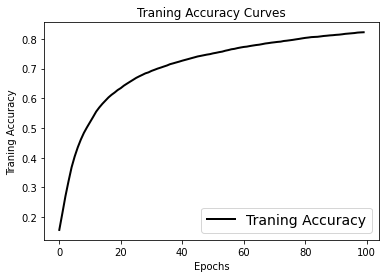

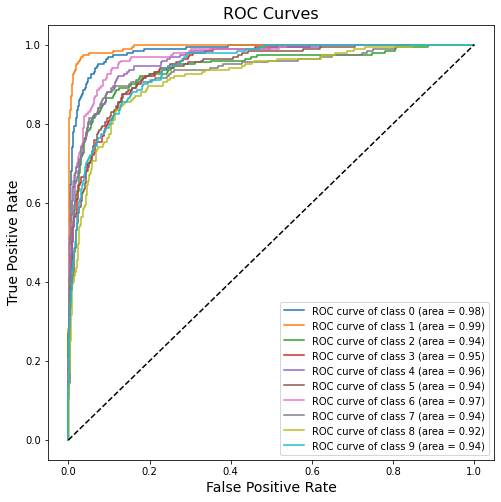

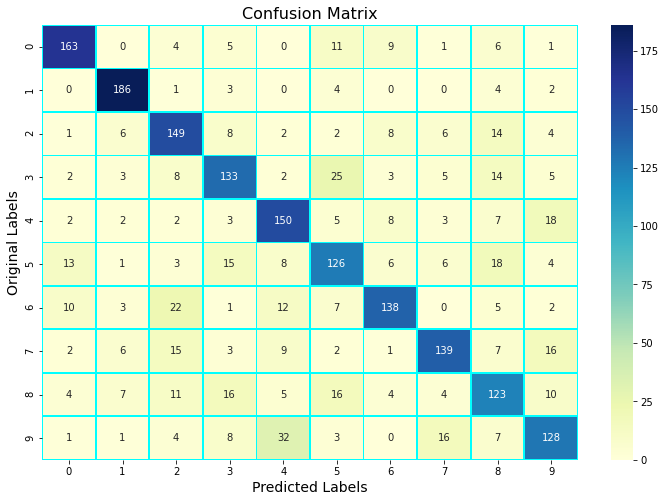

In [ ]:
# joblib.dump(obj3, '/content/drive/MyDrive/DL/Assignment_2/Tanh_Q1')
obj3 = joblib.load('/content/drive/MyDrive/DL/Assignment_2/Tanh_Q1')
l1,l2 = obj3.get_loss()
plotting_epochs(l1, 'Training Loss')
plotting_epochs(l2,'Validation Loss')
plotting_epochs(obj3.get_accuracy(), 'Traning Accuracy')
obj3.roc_curve(X_test, y_test)
y_pred = obj3.predict(X_test)
heatMap(y_test, y_pred, (12,8))

In [ ]:
obj33 = mlp.MLPClassifier([784, 784, 392, 10], activation_function='tanh', learning_rate=10)
obj33.fit(X_train, y_train)
print("Final Testing Accuracy: {0:.2f}%".format(obj33.score(X_test, y_test)*100))

Epoch:1/100 
	==============================> Training Accuracy: 0.114 - Training Loss: 16.298
Epoch:2/100 
	==============================> Training Accuracy: 0.375 - Training Loss: 14.696
Epoch:3/100 
	==============================> Training Accuracy: 0.360 - Training Loss: 17.961
Epoch:4/100 
	==============================> Training Accuracy: 0.394 - Training Loss: 19.215
Epoch:5/100 
	==============================> Training Accuracy: 0.424 - Training Loss: 16.683
Epoch:6/100 
	==============================> Training Accuracy: 0.434 - Training Loss: 17.436
Epoch:7/100 
	==============================> Training Accuracy: 0.527 - Training Loss: 13.047
Epoch:8/100 
	==============================> Training Accuracy: 0.569 - Training Loss: 11.602
Epoch:9/100 
	==============================> Training Accuracy: 0.713 - Training Loss: 7.445
Epoch:10/100 
	==============================> Training Accuracy: 0.652 - Training Loss: 9.098
Epoch:11/100 
	==============================> Trai

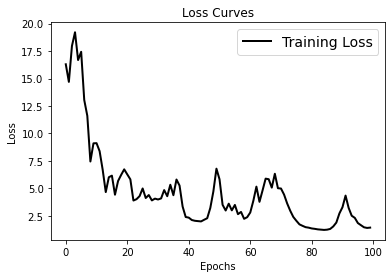

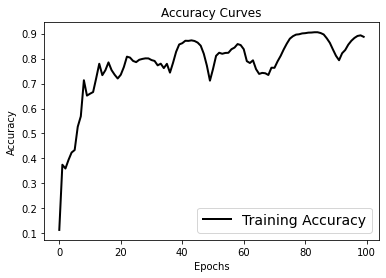

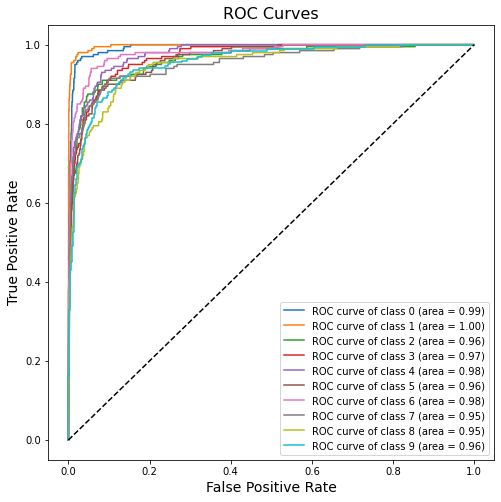

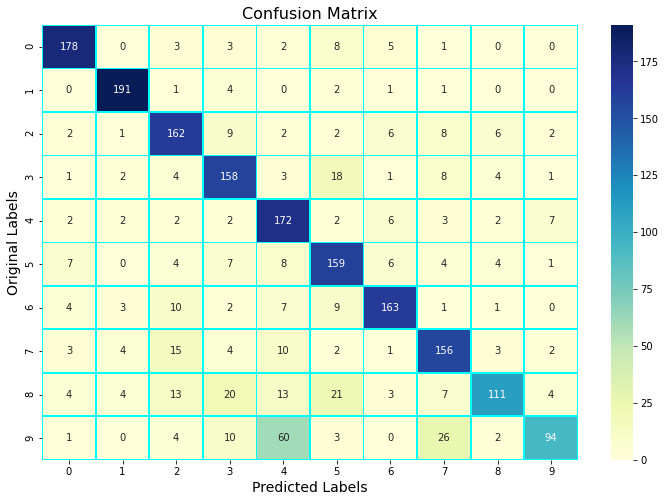

In [ ]:
# joblib.dump(obj33, '/content/drive/MyDrive/DL/Assignment_2/Tanh_Q1_GreaterLR')
obj33 = joblib.load('/content/drive/MyDrive/DL/Assignment_2/Tanh_Q1_GreaterLR')
plotting_epochs(obj33.get_loss(), 'Loss')
plotting_epochs(obj33.get_accuracy(), 'Accuracy')
obj33.roc_curve(X_test, y_test)
y_pred = obj33.predict(X_test)
heatMap(y_test, y_pred, (12,8))

## Extras

In [ ]:
class MLPClassifier:
    def __init__(self, layers, X_test, y_test, learning_rate=1e-5, activation_function='relu', optimizer='gradient_descent', weight_init='random', regularization='l2', batch_size=64, num_epochs=100, dropouts=0.3, **kwargs):
      self.layers = layers
      self.lr = learning_rate
      self.activation = activation_function
      self.optimizer = optimizer
      self.weight_init = weight_init
      self.regularization = regularization
      self.to=None
      if(optimizer == 'gradient_descent' or optimizer == 'GradMom' or optimizer == 'Nestrov'):
      #if(optimizer == 'gradient_descent'):
        self.batch_size = -1
      else:
        self.batch_size = batch_size
      self.num_epochs = num_epochs
      self.dropouts = dropouts
      self.X_test_ = X_test
      self.y_test_ = y_test

    def checking_accuracy(self, y_test, y_pred):
      n=0
      j=0
      while (j<y_test.size): #test_accuracy
        if (y_pred[j] == y_test[j]):
          n+=1
        j+=1
      accu = n/j
      return accu

    def relu(self, X):
      # for i in range(len(X)):  
      #   X[i] = np.maximum(X[i], 0)
      # return X
      np.clip(X, 0, np.finfo(X.dtype).max, out=X)
      return X

    def sigmoid(self, x):
      
      s=1/(1+np.exp(-x)) 
      return s

    def sigmoid_derivative(self, x):
      s=1/(1+np.exp(-x)) 
      return s*(1-s)
    
    def tanh(self, x):
      return np.tanh(x)

    def tanh_derivative(self, x):
      return 1-np.tanh(x)**2

    def softmax(self, X):
      # z -= np.max(z)
      # return np.exp(z) / np.sum(np.exp(z))
      tmp = X - X.max(axis=1)[:, np.newaxis]
      np.exp(tmp, out=X)
      X /= X.sum(axis=1)[:, np.newaxis]
      return X

    def relu_derivative(self, x):
        x[x <= 0] = 0
        x[x > 0] = 1
        return x

    def categorical(self, y, classes):
      n_samples = y.shape[0]
      n_classes = len(classes)
      classes = np.asarray(classes)
      sorted_class = np.sort(classes)

      Y = np.zeros((n_samples, n_classes))
      indices = np.searchsorted(sorted_class, y)
      Y[np.arange(n_samples), indices] = 1
      return Y

    def form_batches(self,X,Y):
        if(self.batch_size == -1):
          self.batch_size = Y.shape[0]
        batches=math.ceil(Y.shape[0]/self.batch_size)
        feature_batches=np.array_split(X,batches,axis=0)
        target_batches=np.array_split(Y,batches,axis=0)
        return batches,feature_batches,target_batches

    def cross_entropy_loss(self, y, yHat):

      if y.shape[1] == 1:
        return -np.log(yHat)
      else:
        return -np.log(1 - yHat)

    def categorical_cross_entropy(self, y_orig, y_pred):
      sum_score = 0.0
      for i in range(len(y_orig)):
        for j in range(len(y_orig[i])):
          sum_score += y_orig[i][j] * np.log(1e-15 + y_pred[i][j])
      mean_sum_score = 1.0 / len(y_orig) * sum_score
      return -mean_sum_score

    def fit(self, X_train, y_train):
      self.parameters = {}

      rand_state = np.random.RandomState(42)
      for i in range(1, len(self.layers)):
        self.parameters['w' + str(i)] = rand_state.uniform(-1., 1., (self.layers[i - 1], self.layers[i]))
        self.parameters['b' + str(i)] = rand_state.uniform(-1., 1., self.layers[i])

      self.loss_epochs, self.accuracy_epochs = [], []
      self.testloss=[]

      classes = list(set(y_train))
      y_original = self.categorical(y_train, classes)
      y_test11 = self.categorical(self.y_test_, classes)
      X1=np.array(X_train)
      Y1=np.array(y_original)
      
      for j in range(self.num_epochs):
       

        batches,X_train_,y_train_=self.form_batches(X1,Y1)
        X_train_=np.array(X_train_)
        y_train_=np.array(y_train_)

        for b in range(batches):
        
            y_pred, self.parameters = self.forward_prop(X_train_[b], self.parameters, self.layers)

            self.parameters = self.back_prop(X_train_[b], y_train_[b], self.parameters, self.layers)
            #print(1)
            params, grads = [], []
            for indx in "w", "b":
                for i in range(1, len(self.layers)):
                    params.append(self.parameters[indx + str(i)])
                    grads.append(self.parameters['d' + indx + str(i)])

            params = np.array(params)
            grads = np.array(grads)
           
            if (self.optimizer=='RMS'):
              optimizer = RMSProp(params, self.lr,0.9,1e-5)
            elif (self.optimizer=='GradMom'):
              optimizer = GradMom(params, self.lr,0.9)
              
            elif (self.optimizer=='Nestrov'):
              optimizer = Nestrov(params, self.lr,0.9)
            elif (self.optimizer=='Ada'):
              optimizer = AdaGrad(params, self.lr,1e-5)
            elif (self.optimizer=='Adam'):
              optimizer = Adam(params, self.lr,1e-5,0.9,0.99)
            else: 
              optimizer = GradientOptimizer(params, self.lr) 
            
            params = optimizer.update_param(grads)

            k = 0
            for i in range(1, len(self.layers)):
                self.parameters['w' + str(i)] = params[k]
                k += 1

            for i in range(1, len(self.layers)):
                self.parameters['b' + str(i)] = params[k]
                k += 1
            
        
        
        # print("Epoch:{0:d}/{1:d} =======> loss: {2:.3f}".format(j, self.num_epochs, c_loss))
        if j == 0:
            self.oneHot_Orig = dict()
            for i in range(len(y_original)):
                self.oneHot_Orig[str(y_original[i])] = y_train[i]
                if (len(self.oneHot_Orig) == len(classes)):
                  break

        y_pred, _ = self.forward_prop(X_train, self.parameters, self.layers)
        c_loss = self.categorical_cross_entropy(y_original, y_pred)
        y_pred1, _ = self.forward_prop(self.X_test_, self.parameters, self.layers)
        c_loss1 = self.categorical_cross_entropy(y_test11, y_pred1)
        y_p = self.convert_to_labels(y_pred)
        accu = self.checking_accuracy(y_train, y_p)
        self.loss_epochs.append(c_loss)
        self.testloss.append(c_loss1)
        self.accuracy_epochs.append(accu)
        print("Epoch:{0:d}/{1:d} \n\t==============================> Training Accuracy: {2:.3f} - Training Loss: {3:.3f}".format(j+1, self.num_epochs, accu, c_loss))

    def activation_forward(self, parameters, layers, activat, i):
      if len(layers)-1 == i:
        parameters['y'] = self.softmax(parameters['z' + str(i)])
      elif activat == 'sigmoid':
        parameters['x' + str(i)] = self.sigmoid(parameters['z' + str(i)])
      elif activat == 'tanh':
        parameters['x' + str(i)] = self.tanh(parameters['z' + str(i)])
      else:
        parameters['x' + str(i)] = self.relu(parameters['z' + str(i)])
      return parameters

    def forward_prop(self, data, parameters, layers):
      
      parameters['x' + str(0)] = data

      for i in range(1, len(layers)):
          parameters['z' + str(i)] = np.add(np.dot(parameters['x' + str(i - 1)], parameters['w' + str(i)]),
                                            parameters['b' + str(i)])

          parameters = self.activation_forward(parameters, layers, self.activation, i)

      return parameters['y'], parameters


    def back_prop(self, X_train, Y, parameters, layers):
      m = X_train.shape[0]
      total_layers = len(layers)
      parameters['dz' + str(total_layers - 1)] = (1 / m) * (parameters['y'] - Y)
      parameters['dw' + str(total_layers - 1)] = np.dot((parameters['x' + str(total_layers - 2)]).T,
                                                        parameters['dz' + str(total_layers - 1)])
      parameters['db' + str(total_layers - 1)] = parameters['dz' + str(total_layers - 1)].sum()

      for i in range(total_layers - 2, 0, -1): #From output layer towards input layer
          if (self.activation == 'sigmoid'):
            parameters['dz' + str(i)] = (1 / m) * (np.dot(parameters['dz' + str(i + 1)],(parameters['w' + str(i + 1)]).T) *
                                                (self.sigmoid_derivative(parameters['z' + str(i)])))
          elif (self.activation == 'tanh'):
            parameters['dz' + str(i)] = (1 / m) * (np.dot(parameters['dz' + str(i + 1)],(parameters['w' + str(i + 1)]).T) *
                                                (self.tanh_derivative(parameters['z' + str(i)])))
          else:
            parameters['dz' + str(i)] = (1 / m) * (np.dot(parameters['dz' + str(i + 1)],(parameters['w' + str(i + 1)]).T) *
                                                (self.relu_derivative(parameters['z' + str(i)])))
          parameters['dw' + str(i)] = np.dot((parameters['x' + str(i - 1)]).T, parameters['dz' + str(i)])
          parameters['db' + str(i)] = parameters['dz' + str(i)].sum()
      return parameters

    def convert_to_labels(self, y_test):
      y_test = (y_test == y_test.max(axis=1)[:, None]).astype(float)
      res = []
      # print(self.oneHot_Orig)
      for i in range(y_test.shape[0]):
        try:
          res.append(self.oneHot_Orig[str(y_test[i])])
        except:
          res.append(0)

      return np.array(res)

    def roc_curve(self, X_test, y_test):
      classes = list(set(y_test))
      n_classes = len(classes)
      y_original = self.categorical(y_test, classes)
      fpr = dict()
      tpr = dict()
      roc_auc = dict()
      y_score, _ = self.forward_prop(X_test, self.parameters, self.layers)
      for i in range(len(classes)):
          fpr[i], tpr[i], _ = metrics.roc_curve(y_original[:, i], y_score[:, i])
          roc_auc[i] = metrics.auc(fpr[i], tpr[i])
      # print(self.fpr, self.tpr)
      all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
      mean_tpr = np.zeros_like(all_fpr)
      for i in range(n_classes):
          mean_tpr += interp(all_fpr, fpr[i], tpr[i])
      
      mean_tpr /= n_classes

      plt.figure(figsize=[8,8])
      for i in range(n_classes):
          plt.plot(fpr[i], tpr[i],
                  label='ROC curve of class {0} (area = {1:0.2f})'
                  ''.format(i, roc_auc[i]))

      plt.plot([0, 1], [0, 1], 'k--')
      
      plt.xlabel('False Positive Rate', size=14)
      plt.ylabel('True Positive Rate', size=14)
      plt.title('ROC Curves', size=16)
      plt.legend(loc="lower right")
      plt.show()

    def predict(self, X_test):

      y_test, self.parameters = self.forward_prop(X_test, self.parameters, self.layers)
      return self.convert_to_labels(y_test)
      

    def predict_proba(self, X_test):
      y_test, self.parameters = self.forward_prop(X_test, self.parameters, self.layers)
      return y_test

    def get_params(self):
      return self.parameters
    
    def score(self, X, y):
      y_pred = self.predict(X)
      return self.checking_accuracy(y, y_pred)
    
    def get_loss(self):
      return self.loss_epochs,self.testloss
    def get_accuracy(self):
      return self.accuracy_epochs